In [5]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 7.2 MB/s 
     |████████████████████████████████| 180 kB 46.3 MB/s 
     |████████████████████████████████| 97 kB 7.5 MB/s 
     |████████████████████████████████| 139 kB 52.8 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=d48635473a164a3c7a877ae7d2a4fe78f252ca375efd1ebc908da59fed965213
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=58dcaf5c4b8a55530e28e3cdc6e38e011f79067faa67d3b7f61f045ee31f76b7
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


ref: https://github.com/chaoshangcs/GTS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/PhD/MLCollective/graphbatt/GTS
!ls

/content/drive/MyDrive/PhD/MLCollective/graphbatt/GTS
'1. gts-graphbatt-train.ipynb'
'2. gts-graphbatt-benchmarking.ipynb'
'4b. monteCarlo-gts-gaets-benchmarkData-train-evaluate.ipynb'
'4c. all-monteCarlo-gts-gaets-graphbatt-train-evaluate.ipynb'
'4. monteCarlo-gts-gaets-graphbatt-train-evaluate.ipynb'
'5. loop-CustomWindow-monteCarlo-gts-gaets-graphbatt-train-evaluate.ipynb'
 data
 gts-debug.ipynb
 lib
 LICENSE
 model
 models
 pytorch-geometric-temporal.ipynb
 README.md
 requirements.txt
 runs
 scripts
 train.py
 wandb


In [ ]:
import argparse
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

## read data and convert to h5

1. pick the right dataset for train/test
2. need to adjust dim_fc, num_nodes, seq_len (window size. currently 12, need something more appropriate)

In [ ]:
# METR-LA
!python -m scripts.generate_training_data_ori --output_dir=data/METR-LA --traffic_df_filename=data/metr-la.h5

Generating training data
tcmalloc: large alloc 1361199104 bytes == 0x56482d928000 @  0x7f80ddc551e7 0x7f80db75546e 0x7f80db7a5c7b 0x7f80db7a5d18 0x7f80db84d010 0x7f80db84d73c 0x7f80db84d85d 0x564774ad9749 0x7f80db792ef7 0x564774ad7437 0x564774ad7240 0x564774b4a973 0x564774b459ee 0x564774ad8bda 0x564774b47737 0x564774b45ced 0x564774a17e2b 0x7f80db792ef7 0x564774ad7437 0x564774ad7240 0x564774b4a973 0x564774b459ee 0x564774ad8bda 0x564774b47737 0x564774b459ee 0x564774ad8bda 0x564774b47737 0x564774ad8afa 0x564774b46915 0x564774ad8afa 0x564774b46915
tcmalloc: large alloc 1361199104 bytes == 0x56487f3c6000 @  0x7f80ddc551e7 0x7f80db75546e 0x7f80db7a5c7b 0x7f80db7a5d18 0x7f80db84d010 0x7f80db84d73c 0x7f80db84d85d 0x564774ad9749 0x7f80db792ef7 0x564774ad7437 0x564774ad7240 0x564774b4a973 0x564774b459ee 0x564774ad8bda 0x564774b47737 0x564774b45ced 0x564774a17e2b 0x7f80db792ef7 0x564774ad7437 0x564774ad7240 0x564774b4a973 0x564774b459ee 0x564774ad8bda 0x564774b47737 0x564774b459ee 0x564774ad8bda 

In [ ]:
# # PEMS-BAY
# !python -m scripts.generate_training_data_ori --output_dir=data/PEMS-BAY --traffic_df_filename=data/pems-bay.h5

## monte carlo sweep

In [ ]:
import os
import re

import torch

from tqdm.notebook import tqdm
import networkx as nx

class DummyTrainArgs():
  def __init__(self, config_filename, use_cpu_only, temperature):
    self.config_filename = config_filename
    self.use_cpu_only = use_cpu_only
    self.temperature = temperature

import argparse
import yaml
from importlib import reload
import model
reload(model)
from model.pytorch.supervisor import GTSSupervisor, GAETSSupervisor
from lib.utils import load_graph_data
import torch

import scripts.eval_baseline_methods

import argparse
import numpy as np
import pandas as pd

from statsmodels.tsa.vector_ar.var_model import VAR

# from lib import utils
from lib.metrics import masked_rmse_np, masked_mape_np, masked_mae_np
from lib.utils import StandardScaler

from tqdm.notebook import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## single sweep

In [ ]:
# acyclic lost is just too big
# GAETS
!python train.py --config_filename=data/model/para_la.yaml --temperature=0.5 --model_name="GAETS"


2021-10-01 15:20:03,381 - INFO - Log directory: data/model/GAETS_DR_3_h_12_64_lr_0.005_bs_64_1001152003/
2021-10-01 15:20:23,166 - INFO - Model created
wandb: Currently logged in as: eekosasih (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.3
wandb: Syncing run GAETS_2021-10-01T15:20:02.998851
wandb: ⭐️ View project at https://wandb.ai/eekosasih/GraphBatt
wandb: 🚀 View run at https://wandb.ai/eekosasih/GraphBatt/runs/1aj2uc34
wandb: Run data is saved locally in /content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/wandb/run-20211001_152023-1aj2uc34
wandb: Run `wandb offline` to turn off syncing.

2021-10-01 15:20:27,139 - INFO - Start training ...
2021-10-01 15:20:27,140 - INFO - num_batches:375
Num of epoch: 0
2021-10-01 15:20:27,280 - INFO - Total trainable parameters 45699485
2021-10-01 15:22:11,887 - INFO - epoch complete
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.st

In [6]:
# single sweep

# train GTS
!python train.py --config_filename=data/model/para_la.yaml --temperature=0.5 --model_name="GTS"


2021-10-01 23:02:28,157 - INFO - Log directory: data/model/GTS_DR_3_h_12_64_lr_0.005_bs_64_1001230228/
2021-10-01 23:02:43,690 - INFO - Model created
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.12.3
wandb: Syncing run GTS_2021-10-01T23:02:28.142251
wandb: ⭐️ View project at https://wandb.ai/eekosasih/GraphBatt
wandb: 🚀 View run at https://wandb.ai/eekosasih/GraphBatt/runs/1nl4sa7b
wandb: Run data is saved locally in /content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/wandb/run-20211001_230317-1nl4sa7b
wandb: Run `wandb offline` to turn off syncing.

2021-10-01 23:03:23,594 - INFO - Start training .

2021-09-30 12:39:25,546 - INFO - Log directory: data/model/GTS_DR_3_h_12_64_lr_0.005_bs_64_0930123921/
2021-09-30 12:39:51,319 - INFO - Model created
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 2
wandb: You chose 'Use an existing W&B account'
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Tracking run with wandb version 0.12.2
wandb: Syncing run GTS_2021-09-30T12:39:20.095717
wandb: ⭐️ View project at https://wandb.ai/eekosasih/GraphBatt
wandb: 🚀 View run at https://wandb.ai/eekosasih/GraphBatt/runs/138igl37
wandb: Run data is saved locally in /content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/wandb/run-20210930_124817-138igl37
wandb: Run `wandb offline` to turn off syncing.

2021-09-30 12:48:23,432 - INFO - Start training .

## debug visualisation

see why GAETS is not performing better than GTS

look at learned adjacency matrix, reconstruction node features and reconstructed signal.

In [ ]:
""" LOAD FROM DIFFERENT FILES """
import numpy as np
from lib.utils import DataLoader

# load test dataset
def create_test_iterator(supervisor, supervisor_config, test_dataset_dir = "data/graphbatt/test"):
  data = {}
  category = 'test'
  cat_data = np.load(os.path.join(test_dataset_dir, category + '.npz'))
  _x = cat_data['x']
  _y = cat_data['y']
  # use scaler from supervisor trained's scaler
  scaler = supervisor.train_scaler
  _x[..., 0] = scaler.transform(_x[..., 0])
  _y[..., 0] = scaler.transform(_y[..., 0])
  test_loader = DataLoader(_x, _y, supervisor_config["data"]["test_batch_size"], shuffle=False)

  return test_loader.get_iterator()

## debug GAETS

0it [00:00, ?it/s]

0.4640889 1.1180587 0.22698553
0


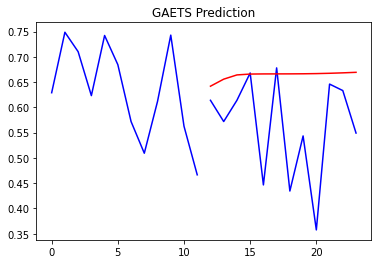

1


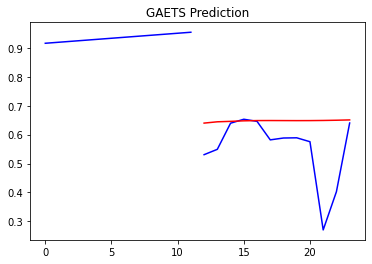

2


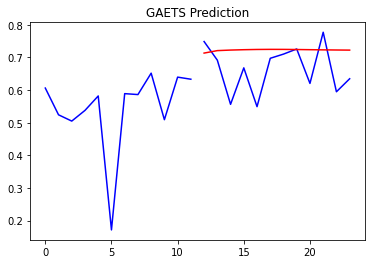

3


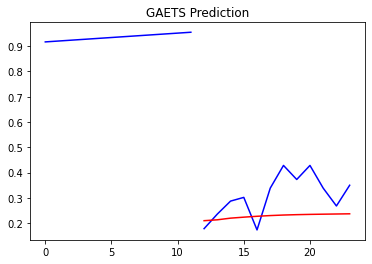

4


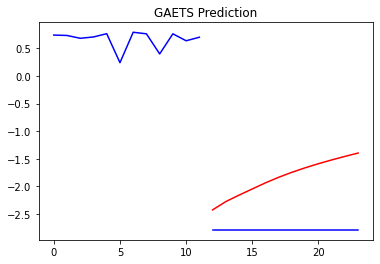

5


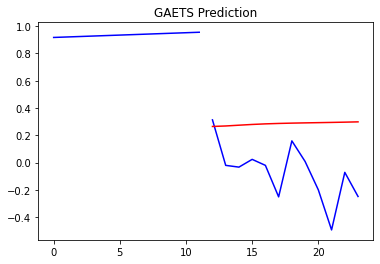

In [ ]:
# # visualise result
# """
# VISUALISE GAETS
# """

# load model and test dataset
args = DummyTrainArgs(config_filename="data/model/para_la.yaml", use_cpu_only=False, temperature=0.5)
with open(args.config_filename) as f:
    supervisor_config = yaml.load(f)
    supervisor_config["train"]["save_model"] = 0
    supervisor_config["train"]["epochs"] = 1
    save_adj_name = args.config_filename[11:-5]
    supervisor_gaets = GAETSSupervisor(save_adj_name, temperature=args.temperature, **supervisor_config)
    supervisor_gaets.GTS_model.use_curriculum_learning = False
    supervisor_gaets.train()

# get largest epoch
files = os.listdir("models/GAETS")
largestGAETSEpoch = max([int(re.search("epo(.+?).tar", x).group(1)) for x in files])

# # Load Model
supervisor_gaets._epoch_num = largestGAETSEpoch
supervisor_gaets.load_model()
label = "with_regularization"
temp_gaets = supervisor_gaets.temperature
gumbel_soft = True
batches_seen = 1

# get test data from unseen dataset
gaets_test_iterator = create_test_iterator(supervisor_gaets, supervisor_config, "data/METR-LA")

"""
COMPARE PERFORMANCE
"""
# for each batch
gaets_rmses = []
gaets_mapes = []
gaets_maes = []

# for each batch
for batch_idx, (_x, _y) in tqdm(enumerate(gaets_test_iterator)):
  """ GAETS """
  x, y = supervisor_gaets._prepare_data(_x, _y)
  supervisor_gaets.GTS_model = supervisor_gaets.GTS_model.eval()
  # output, mid_output, _train_feas_rec = supervisor_gaets.GTS_model(label, x, supervisor_gaets._train_feas, temp_gaets, gumbel_soft, y, batches_seen)
  output, mid_output, _train_feas_rec, _ = supervisor_gaets.GTS_model(label, x, supervisor_gaets._train_feas, temp_gaets, gumbel_soft, y, batches_seen)
  output = output.detach()
  # for each batch
  for i in range(x.shape[1]):
    input = x[:, i, :].cpu().numpy()
    labels = y[:, i, :].cpu().numpy()
    gaets_prediction = output[:, i, :].cpu().numpy()
    gaets_rmse = masked_rmse_np(preds=gaets_prediction, labels=labels, null_val=0)
    gaets_mape = masked_mape_np(preds=gaets_prediction, labels=labels, null_val=0)
    gaets_mae = masked_mae_np(preds=gaets_prediction, labels=labels, null_val=0)

    # keep track
    if abs(gaets_rmse) < np.float("inf"):
      gaets_rmses.append(gaets_rmse)
    if abs(gaets_mape) < np.float("inf"):
      gaets_mapes.append(gaets_mape)
    if abs(gaets_mae) < np.float("inf"):
      gaets_maes.append(gaets_mae)


print(np.median(gaets_rmses), np.median(gaets_mapes), np.median(gaets_maes))

# for each measurement
for i in range(6):

  print(i)

  plt.title("GAETS Prediction")
  plt.plot(range(input.shape[0]), input[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), labels[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), gaets_prediction[:, i], c="r")
  plt.show()

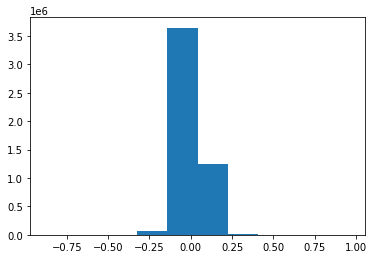

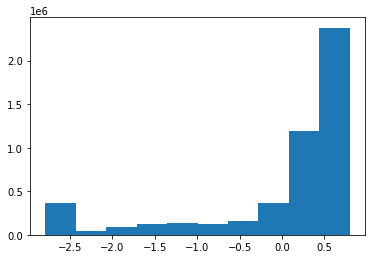

In [ ]:
## visualise autoencoder reconstruction
plt.hist(_train_feas_rec.detach().cpu().numpy().flatten())
plt.show()
plt.hist(supervisor_gaets._train_feas.detach().cpu().numpy().flatten())
plt.show()


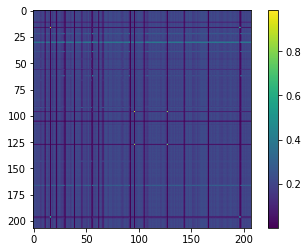

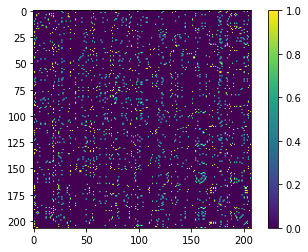

In [ ]:
# visualise adjacency matrix

plt.imshow(mid_output.detach().cpu().numpy())
plt.colorbar()
plt.show()

plt.imshow(supervisor_gaets.adj_mx.detach().cpu().numpy())
plt.colorbar()
plt.show()

# suspect need more complex decoder to reconstruct node features

In [ ]:
(mid_output > 0.5).sum()

tensor(15, device='cuda:0')

In [ ]:
# design more complex decoder
from torch.nn import functional as F
from model.pytorch.model import gumbel_softmax
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

self, label, inputs, node_feas, temp, gumbel_soft, labels, batches_seen = supervisor_gaets.GTS_model, label, x, supervisor_gaets._train_feas, temp_gaets, gumbel_soft, y, batches_seen

# def forward(self, label, inputs, node_feas, temp, gumbel_soft, labels=None, batches_seen=None):
"""
:param inputs: shape (seq_len, batch_size, num_sensor * input_dim)
:param labels: shape (horizon, batch_size, num_sensor * output)
:param batches_seen: batches seen till now
:return: output: (self.horizon, batch_size, self.num_nodes * self.output_dim)
"""
x = node_feas.transpose(1, 0).view(self.num_nodes, 1, -1)
x = self.conv1(x)
x = F.relu(x)
x = self.bn1(x)
# x = self.hidden_drop(x)
x = self.conv2(x)
x = F.relu(x)
x = self.bn2(x)
x = x.view(self.num_nodes, -1)
x = self.fc(x)
x = F.relu(x)
x = self.bn3(x)

# hidden embedding
z = x

receivers = torch.matmul(self.rel_rec, x)
senders = torch.matmul(self.rel_send, x)
x = torch.cat([senders, receivers], dim=1)
x = torch.relu(self.fc_out(x))
x = self.fc_cat(x)

adj = gumbel_softmax(x, temperature=temp, hard=True)
adj = adj[:, 0].clone().reshape(self.num_nodes, -1)
# mask = torch.eye(self.num_nodes, self.num_nodes).to(device).byte()
mask = torch.eye(self.num_nodes, self.num_nodes).bool().to(device)
adj.masked_fill_(mask, 0)

# encoder_hidden_state = self.encoder(inputs, adj)
# self._logger.debug("Encoder complete, starting decoder")
# outputs = self.decoder(encoder_hidden_state, adj, labels, batches_seen=batches_seen)
# self._logger.debug("Decoder complete")
# if batches_seen == 0:
#     self._logger.info(
#         "Total trainable parameters {}".format(count_parameters(self))
#     )
    
# branch 2: autoencoder to get the original x
# we want node_feas = decoder ( W * encoder(node_feas))
# z = encoder(node_feas)
# z_agg = W * encoder(node_feas)
# z_agg = torch.matmul(adj, z)
z_agg = torch.matmul(adj, z)
x_rec = z_agg.view(self.num_nodes, 1, -1)
x_rec = self.convTranspose1(x_rec)
x_rec = F.relu(x_rec)
x_rec = self.convTranspose2(x_rec)
x_rec = F.relu(x_rec)
x_rec = self.fcTranspose1(x_rec)
x_rec = x_rec.view(-1, self.num_nodes)

# outputs, x.softmax(-1)[:, 0].clone().reshape(self.num_nodes, -1), x_rec


In [ ]:
torch.nn.MSELoss()(z, z_agg)

tensor(0.0359, device='cuda:0', grad_fn=<MseLossBackward>)

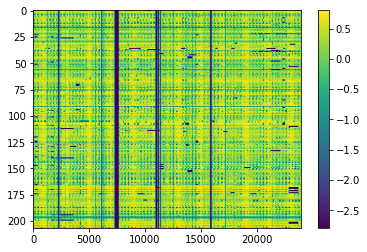

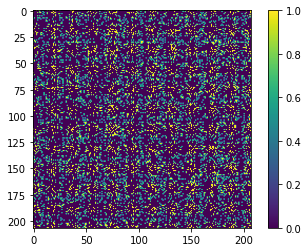

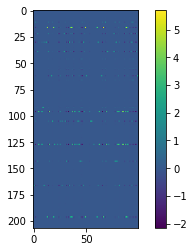

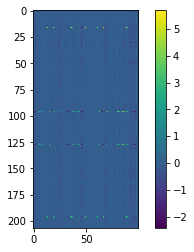

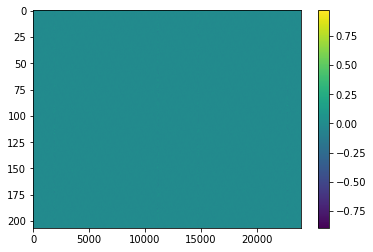

In [ ]:
plt.imshow(node_feas.transpose(1, 0).detach().cpu().numpy(), aspect="auto")
plt.colorbar()
plt.show()

plt.imshow(adj.detach().cpu().numpy())
plt.colorbar()
plt.show()

plt.imshow(z.detach().cpu().numpy())
plt.colorbar()
plt.show()

plt.imshow(z_agg.detach().cpu().numpy())
plt.colorbar()
plt.show()

plt.imshow(x_rec.transpose(1, 0).detach().cpu().numpy(), aspect="auto")
plt.colorbar()
plt.show()

In [ ]:
z_agg = torch.matmul(adj, z)

torch.Size([23990, 207])

2021-09-28 21:40:47,953 - INFO - Loaded model at 22


0it [00:00, ?it/s]

0.5723282 0.99955016 0.23409092
0


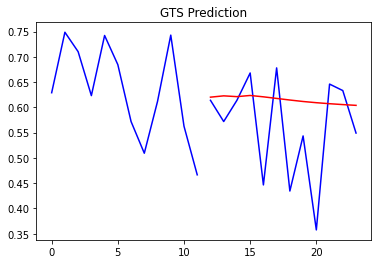

1


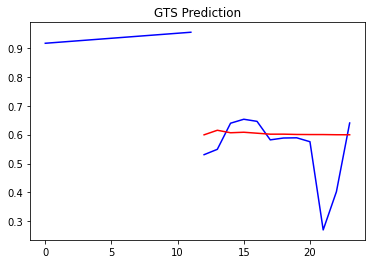

2


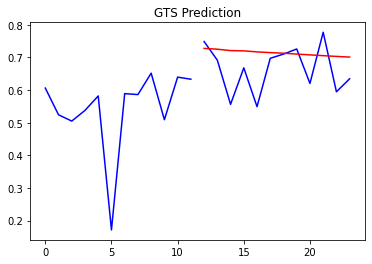

3


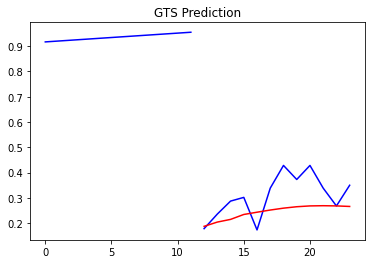

4


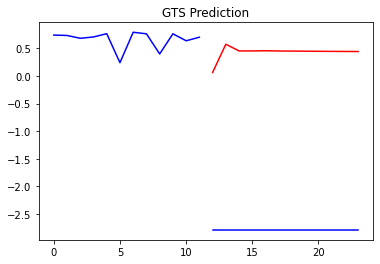

5


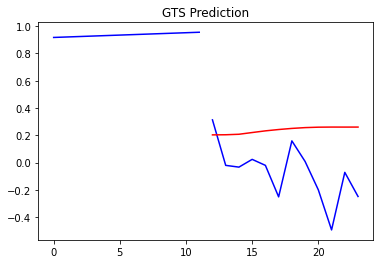

In [ ]:
# # visualise result
# """
# VISUALISE GTS
# """

# load model and test dataset
args = DummyTrainArgs(config_filename="data/model/para_la.yaml", use_cpu_only=False, temperature=0.5)
with open(args.config_filename) as f:
    supervisor_config = yaml.load(f)
    supervisor_config["train"]["save_model"] = 0
    supervisor_config["train"]["epochs"] = 1
    save_adj_name = args.config_filename[11:-5]
    supervisor_gts = GTSSupervisor(save_adj_name, temperature=args.temperature, **supervisor_config)
    supervisor_gts.GTS_model.use_curriculum_learning = False
    supervisor_gts.train()

# get largest epoch
files = os.listdir("models/GTS")
largestGTSEpoch = max([int(re.search("epo(.+?).tar", x).group(1)) for x in files])

# Load Model
supervisor_gts._epoch_num = largestGTSEpoch
supervisor_gts.load_model()
label = "with_regularization"
temp_gts = supervisor_gts.temperature
gumbel_soft = True
batches_seen = 1

# get test data from unseen dataset
gts_test_iterator = create_test_iterator(supervisor_gts, supervisor_config, "data/METR-LA")

"""
COMPARE PERFORMANCE
"""
# for each batch
gts_rmses = []
gts_mapes = []
gts_maes = []

# for each batch
for batch_idx, (_x, _y) in tqdm(enumerate(gts_test_iterator)):
  """ GAETS """
  x, y = supervisor_gts._prepare_data(_x, _y)
  supervisor_gts.GTS_model = supervisor_gts.GTS_model.eval()
  output, mid_output = supervisor_gts.GTS_model(label, x, supervisor_gts._train_feas, temp_gts, gumbel_soft, y, batches_seen)
  output = output.detach()
  # for each batch
  for i in range(x.shape[1]):
    input = x[:, i, :].cpu().numpy()
    labels = y[:, i, :].cpu().numpy()
    gts_prediction = output[:, i, :].cpu().numpy()
    gts_rmse = masked_rmse_np(preds=gts_prediction, labels=labels, null_val=0)
    gts_mape = masked_mape_np(preds=gts_prediction, labels=labels, null_val=0)
    gts_mae = masked_mae_np(preds=gts_prediction, labels=labels, null_val=0)

    # keep track
    if abs(gts_rmse) < np.float("inf"):
      gts_rmses.append(gts_rmse)
    if abs(gts_mape) < np.float("inf"):
      gts_mapes.append(gts_mape)
    if abs(gts_mae) < np.float("inf"):
      gts_maes.append(gts_mae)


print(np.median(gts_rmses), np.median(gts_mapes), np.median(gts_maes))

# for each measurement
for i in range(6):

  print(i)

  plt.title("GTS Prediction")
  plt.plot(range(input.shape[0]), input[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), labels[:, i], c="b")
  plt.plot(range(input.shape[0], input.shape[0] + labels.shape[0]), gts_prediction[:, i], c="r")
  plt.show()

## multiple sweep

In [ ]:
# number of monte carlo iteration
num_mc = 1

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mc_scores = []
for mc_round in tqdm(range(num_mc)):
  # train GTS
  !python train.py --config_filename=data/model/para_la.yaml --temperature=0.5 --model_name="GTS"
  # GAETS
  !python train.py --config_filename=data/model/para_la.yaml --temperature=0.5 --model_name="GAETS"

  # get largest epoch
  files = os.listdir("models/GTS")
  largestGTSEpoch = max([int(re.search("epo(.+?).tar", x).group(1)) for x in files])
  files = os.listdir("models/GAETS")
  largestGAETSEpoch = max([int(re.search("epo(.+?).tar", x).group(1)) for x in files])
  print("best GTS epoch: {} and GAETS epoch: {}".format(largestGTSEpoch, largestGAETSEpoch))

  # load model and test dataset
  args = DummyTrainArgs(config_filename="data/model/para_la_test.yaml", use_cpu_only=False, temperature=0.5)
  with open(args.config_filename) as f:
      supervisor_config = yaml.load(f)
      save_adj_name = args.config_filename[11:-5]
      supervisor_gts = GTSSupervisor(save_adj_name, temperature=args.temperature, **supervisor_config)
      supervisor_gts.train()
      supervisor_gaets = GAETSSupervisor(save_adj_name, temperature=args.temperature, **supervisor_config)
      supervisor_gaets.train()

  # Load Data Batch by Batch
  # best epoch
  supervisor_gts._epoch_num = largestGTSEpoch
  supervisor_gts.load_model()
  supervisor_gaets._epoch_num = largestGAETSEpoch
  supervisor_gaets.load_model()
  label = "with_regularization"
  temp_gts = supervisor_gts.temperature
  temp_gaets = supervisor_gaets.temperature
  gumbel_soft = True
  batches_seen = 0

  # get test data
  test_iterator = supervisor_gts._data["test_loader"].get_iterator()

  """
  COMPARE PERFORMANCE
  """
  # for each batch
  var_rmses = []
  var_mapes = []
  var_maes = []
  gts_rmses = []
  gts_mapes = []
  gts_maes = []
  gaets_rmses = []
  gaets_mapes = []
  gaets_maes = []

  # for each batch
  for batch_idx, (_x, _y) in tqdm(enumerate(test_iterator)):
    """ GAETS """
    x, y = supervisor_gaets._prepare_data(_x, _y)
    output, mid_output, _train_feas_rec = supervisor_gaets.GTS_model(label, x, supervisor_gaets._train_feas, temp_gaets, gumbel_soft, y, batches_seen)
    output = output.detach()
    # for each batch
    for i in range(x.shape[1]):
      labels = y[:, i, :].numpy()
      gaets_prediction = output[:, i, :].numpy()
      gaets_rmse = masked_rmse_np(preds=gaets_prediction, labels=labels, null_val=0)
      gaets_mape = masked_mape_np(preds=gaets_prediction, labels=labels, null_val=0)
      gaets_mae = masked_mae_np(preds=gaets_prediction, labels=labels, null_val=0)

      # keep track
      if abs(gaets_rmse) < np.float("inf"):
        gaets_rmses.append(gaets_rmse)
      if abs(gaets_mape) < np.float("inf"):
        gaets_mapes.append(gaets_mape)
      if abs(gaets_mae) < np.float("inf"):
        gaets_maes.append(gaets_mae)

    """ VAR """
    # for each batch
    for i in range(x.shape[1]):
      labels = y[:, i, :].numpy()
      input = x[:, i, :].numpy()

      # fit VAR model on input
      var_model = VAR(input)
      # TODO: choose best lag
      var_result = var_model.fit(31)
      var_prediction = var_result.forecast(input, 320)

      var_rmse = masked_rmse_np(preds=var_prediction, labels=labels, null_val=0)
      var_mape = masked_mape_np(preds=var_prediction, labels=labels, null_val=0)
      var_mae = masked_mae_np(preds=var_prediction, labels=labels, null_val=0)

      # keep track
      if abs(var_rmse) < np.float("inf"):
        var_rmses.append(var_rmse)
      if abs(var_mape) < np.float("inf"):
        var_mapes.append(var_mape)
      if abs(var_mae) < np.float("inf"):
        var_maes.append(var_mae)

    """ GTS """
    x, y = supervisor_gts._prepare_data(_x, _y)
    output, mid_output = supervisor_gts.GTS_model(label, x, supervisor_gts._train_feas, temp_gaets, gumbel_soft, y, batches_seen)
    output = output.detach()
    # for each batch
    for i in range(x.shape[1]):
      labels = y[:, i, :].numpy()
      gts_prediction = output[:, i, :].numpy()
      gts_rmse = masked_rmse_np(preds=gts_prediction, labels=labels, null_val=0)
      gts_mape = masked_mape_np(preds=gts_prediction, labels=labels, null_val=0)
      gts_mae = masked_mae_np(preds=gts_prediction, labels=labels, null_val=0)

      # keep track
      if abs(gts_rmse) < np.float("inf"):
        gts_rmses.append(gts_rmse)
      if abs(gts_mape) < np.float("inf"):
        gts_mapes.append(gts_mape)
      if abs(gts_mae) < np.float("inf"):
        gts_maes.append(gts_mae)

  """
  get score
  """
  scoreMedianDict = {
    "GAETS": {
        "RMSE": np.median(gaets_rmses), 
        "MAPE": np.median(gaets_mapes), 
        "MAE": np.median(gaets_maes), 
        "RMS data points": len(gaets_rmses), 
        "MAPE data points": len(gaets_mapes), 
        "MAE data points": len(gaets_maes),
        "Best Epoch": largestGAETSEpoch
    },
    "GTS": {
        "RMSE": np.median(gts_rmses), 
        "MAPE": np.median(gts_mapes), 
        "MAE": np.median(gts_maes), 
        "RMS data points": len(gts_rmses), 
        "MAPE data points": len(gts_mapes), 
        "MAE data points": len(gts_maes),
        "Best Epoch": largestGTSEpoch
    },
    "VAR": {
        "RMSE": np.median(var_rmses), 
        "MAPE": np.median(var_mapes), 
        "MAE": np.median(var_maes), 
        "RMS data points": len(var_rmses), 
        "MAPE data points": len(var_mapes), 
        "MAE data points": len(var_maes),
        "Best Epoch": -1
    },
  }
  print(mc_round, scoreMedianDict)
  mc_scores.append(scoreMedianDict)

  # remove model
  !rm models/GTS/*
  !rm models/GAETS/*

  0%|          | 0/12 [00:00<?, ?it/s]

2021-09-22 00:13:04,736 - INFO - Log directory: data/model/GTS_DR_2_h_320_64_lr_0.005_bs_64_0922001304/
2021-09-22 00:13:05,191 - INFO - Model created
wandb: Currently logged in as: eekosasih (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.12.2
wandb: Syncing run GTS_2021-09-22T00:13:04.714501
wandb: ⭐️ View project at https://wandb.ai/eekosasih/GraphBatt
wandb: 🚀 View run at https://wandb.ai/eekosasih/GraphBatt/runs/hkosu54y
wandb: Run data is saved locally in /content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/wandb/run-20210922_001305-hkosu54y
wandb: Run `wandb offline` to turn off syncing.

2021-09-22 00:13:08,672 - INFO - Start training ...
2021-09-22 00:13:08,672 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 00:13:10,119 - INFO - Total trainable parameters 2596563
2021-09-22 00:13:22,967 - INFO - epoch complete
/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` 

wandb: Currently logged in as: eekosasih (use `wandb login --relogin` to force relogin)


2021-09-22 00:47:41,044 - INFO - Start training ...
2021-09-22 00:47:41,046 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 00:47:42,532 - INFO - Total trainable parameters 2596563
2021-09-22 00:47:43,974 - INFO - Total trainable parameters 2596563
2021-09-22 00:48:02,683 - INFO - epoch complete
2021-09-22 00:48:02,686 - INFO - evaluating now!


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 00:48:05,281 - INFO - Epoch [0/1] (6) train_mae: 2.5037, val_mae: 3.5478
2021-09-22 00:48:05,330 - INFO - Saved model at 0
2021-09-22 00:48:05,336 - INFO - Val loss decrease from inf to 3.5478, saving to models/GTS/epo0.tar


training loss,2.5037
validation loss,3.54783


training loss,▁
validation loss,▁


2021-09-22 00:48:08,835 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922004808/
2021-09-22 00:48:08,835 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922004808/
2021-09-22 00:48:09,049 - INFO - Model created
2021-09-22 00:48:09,049 - INFO - Model created


2021-09-22 00:48:12,595 - INFO - Start training ...
2021-09-22 00:48:12,595 - INFO - Start training ...
2021-09-22 00:48:12,611 - INFO - num_batches:6
2021-09-22 00:48:12,611 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 00:48:13,899 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:13,899 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:15,138 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:15,138 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:33,973 - INFO - epoch complete
2021-09-22 00:48:33,973 - INFO - epoch complete
2021-09-22 00:48:33,983 - INFO - evaluating now!
2021-09-22 00:48:33,983 - INFO - evaluating now!


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 00:48:36,670 - INFO - Epoch [0/1] (6) train_mae: 11.7290, val_mae: 10.8863
2021-09-22 00:48:36,670 - INFO - Epoch [0/1] (6) train_mae: 11.7290, val_mae: 10.8863
2021-09-22 00:48:36,736 - INFO - Saved model at 0
2021-09-22 00:48:36,736 - INFO - Saved model at 0
2021-09-22 00:48:36,748 - INFO - Val loss decrease from inf to 10.8863, saving to models/GAETS/epo0.tar
2021-09-22 00:48:36,748 - INFO - Val loss decrease from inf to 10.8863, saving to models/GAETS/epo0.tar


training loss,11.72899
validation loss,10.88628


training loss,▁
validation loss,▁


2021-09-22 00:48:40,987 - INFO - Loaded model at 8
2021-09-22 00:48:40,987 - INFO - Loaded model at 8
2021-09-22 00:48:41,024 - INFO - Loaded model at 48
2021-09-22 00:48:41,024 - INFO - Loaded model at 48


0it [00:00, ?it/s]

2021-09-22 00:48:42,185 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:42,185 - INFO - Total trainable parameters 3072347


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:96: RuntimeWarning: overflow encountered in true_divide
  mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:70: RuntimeWarning: overflow encountered in square
  rmse = np.square(np.subtract(preds, labels)).astype('float32')


2021-09-22 00:48:46,871 - INFO - Total trainable parameters 2596563
2021-09-22 00:48:46,871 - INFO - Total trainable parameters 2596563
2021-09-22 00:48:48,049 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:48,049 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:52,629 - INFO - Total trainable parameters 2596563
2021-09-22 00:48:52,629 - INFO - Total trainable parameters 2596563
2021-09-22 00:48:53,807 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:53,807 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:58,402 - INFO - Total trainable parameters 2596563
2021-09-22 00:48:58,402 - INFO - Total trainable parameters 2596563
2021-09-22 00:48:59,560 - INFO - Total trainable parameters 3072347
2021-09-22 00:48:59,560 - INFO - Total trainable parameters 3072347
2021-09-22 00:49:04,140 - INFO - Total trainable parameters 2596563
2021-09-22 00:49:04,140 - INFO - Total trainable parameters 2596563
2021-09-22 00:49:05,314 - INFO - Total trainable

2021-09-22 01:25:42,102 - INFO - Start training ...
2021-09-22 01:25:42,102 - INFO - Start training ...
2021-09-22 01:25:42,102 - INFO - Start training ...
2021-09-22 01:25:42,112 - INFO - num_batches:6
2021-09-22 01:25:42,112 - INFO - num_batches:6
2021-09-22 01:25:42,112 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 01:25:43,501 - INFO - Total trainable parameters 2596563
2021-09-22 01:25:43,501 - INFO - Total trainable parameters 2596563
2021-09-22 01:25:43,501 - INFO - Total trainable parameters 2596563
2021-09-22 01:25:44,810 - INFO - Total trainable parameters 2596563
2021-09-22 01:25:44,810 - INFO - Total trainable parameters 2596563
2021-09-22 01:25:44,810 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:03,696 - INFO - epoch complete
2021-09-22 01:26:03,696 - INFO - epoch complete
2021-09-22 01:26:03,696 - INFO - epoch complete
2021-09-22 01:26:03,715 - INFO - evaluating now!
2021-09-22 01:26:03,715 - INFO - evaluating now!
2021-09-22 01:26:03,715 - INFO - eval

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 01:26:06,406 - INFO - Epoch [0/1] (6) train_mae: 2.3697, val_mae: 3.5350
2021-09-22 01:26:06,406 - INFO - Epoch [0/1] (6) train_mae: 2.3697, val_mae: 3.5350
2021-09-22 01:26:06,406 - INFO - Epoch [0/1] (6) train_mae: 2.3697, val_mae: 3.5350
2021-09-22 01:26:06,463 - INFO - Saved model at 0
2021-09-22 01:26:06,463 - INFO - Saved model at 0
2021-09-22 01:26:06,463 - INFO - Saved model at 0
2021-09-22 01:26:06,478 - INFO - Val loss decrease from inf to 3.5350, saving to models/GTS/epo0.tar
2021-09-22 01:26:06,478 - INFO - Val loss decrease from inf to 3.5350, saving to models/GTS/epo0.tar
2021-09-22 01:26:06,478 - INFO - Val loss decrease from inf to 3.5350, saving to models/GTS/epo0.tar


training loss,2.36967
validation loss,3.53502


training loss,▁
validation loss,▁


2021-09-22 01:26:10,756 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922012610/
2021-09-22 01:26:10,756 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922012610/
2021-09-22 01:26:10,756 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922012610/
2021-09-22 01:26:10,756 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922012610/
2021-09-22 01:26:10,971 - INFO - Model created
2021-09-22 01:26:10,971 - INFO - Model created
2021-09-22 01:26:10,971 - INFO - Model created
2021-09-22 01:26:10,971 - INFO - Model created


2021-09-22 01:26:14,806 - INFO - Start training ...
2021-09-22 01:26:14,806 - INFO - Start training ...
2021-09-22 01:26:14,806 - INFO - Start training ...
2021-09-22 01:26:14,806 - INFO - Start training ...
2021-09-22 01:26:14,823 - INFO - num_batches:6
2021-09-22 01:26:14,823 - INFO - num_batches:6
2021-09-22 01:26:14,823 - INFO - num_batches:6
2021-09-22 01:26:14,823 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 01:26:16,146 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:16,146 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:16,146 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:16,146 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:17,394 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:17,394 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:17,394 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:17,394 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:36,481 - INFO - epoch compl

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 01:26:39,129 - INFO - Epoch [0/1] (6) train_mae: 11.7966, val_mae: 10.6699
2021-09-22 01:26:39,129 - INFO - Epoch [0/1] (6) train_mae: 11.7966, val_mae: 10.6699
2021-09-22 01:26:39,129 - INFO - Epoch [0/1] (6) train_mae: 11.7966, val_mae: 10.6699
2021-09-22 01:26:39,129 - INFO - Epoch [0/1] (6) train_mae: 11.7966, val_mae: 10.6699
2021-09-22 01:26:39,197 - INFO - Saved model at 0
2021-09-22 01:26:39,197 - INFO - Saved model at 0
2021-09-22 01:26:39,197 - INFO - Saved model at 0
2021-09-22 01:26:39,197 - INFO - Saved model at 0
2021-09-22 01:26:39,223 - INFO - Val loss decrease from inf to 10.6699, saving to models/GAETS/epo0.tar
2021-09-22 01:26:39,223 - INFO - Val loss decrease from inf to 10.6699, saving to models/GAETS/epo0.tar
2021-09-22 01:26:39,223 - INFO - Val loss decrease from inf to 10.6699, saving to models/GAETS/epo0.tar
2021-09-22 01:26:39,223 - INFO - Val loss decrease from inf to 10.6699, saving to models/GAETS/epo0.tar


training loss,11.79657
validation loss,10.6699


training loss,▁
validation loss,▁


2021-09-22 01:26:43,511 - INFO - Loaded model at 0
2021-09-22 01:26:43,511 - INFO - Loaded model at 0
2021-09-22 01:26:43,511 - INFO - Loaded model at 0
2021-09-22 01:26:43,511 - INFO - Loaded model at 0
2021-09-22 01:26:43,558 - INFO - Loaded model at 36
2021-09-22 01:26:43,558 - INFO - Loaded model at 36
2021-09-22 01:26:43,558 - INFO - Loaded model at 36
2021-09-22 01:26:43,558 - INFO - Loaded model at 36


0it [00:00, ?it/s]

2021-09-22 01:26:44,836 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:44,836 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:44,836 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:44,836 - INFO - Total trainable parameters 3072347


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:96: RuntimeWarning: overflow encountered in true_divide
  mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:70: RuntimeWarning: overflow encountered in square
  rmse = np.square(np.subtract(preds, labels)).astype('float32')


2021-09-22 01:26:49,550 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:49,550 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:49,550 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:49,550 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:50,730 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:50,730 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:50,730 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:50,730 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:55,384 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:55,384 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:55,384 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:55,384 - INFO - Total trainable parameters 2596563
2021-09-22 01:26:56,559 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:56,559 - INFO - Total trainable parameters 3072347
2021-09-22 01:26:56,559 - INFO - Total trainable

2021-09-22 02:03:44,299 - INFO - Start training ...
2021-09-22 02:03:44,299 - INFO - Start training ...
2021-09-22 02:03:44,299 - INFO - Start training ...
2021-09-22 02:03:44,299 - INFO - Start training ...
2021-09-22 02:03:44,299 - INFO - Start training ...
2021-09-22 02:03:44,333 - INFO - num_batches:6
2021-09-22 02:03:44,333 - INFO - num_batches:6
2021-09-22 02:03:44,333 - INFO - num_batches:6
2021-09-22 02:03:44,333 - INFO - num_batches:6
2021-09-22 02:03:44,333 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 02:03:45,683 - INFO - Total trainable parameters 2596563
2021-09-22 02:03:45,683 - INFO - Total trainable parameters 2596563
2021-09-22 02:03:45,683 - INFO - Total trainable parameters 2596563
2021-09-22 02:03:45,683 - INFO - Total trainable parameters 2596563
2021-09-22 02:03:45,683 - INFO - Total trainable parameters 2596563
2021-09-22 02:03:47,006 - INFO - Total trainable parameters 2596563
2021-09-22 02:03:47,006 - INFO - Total trainable parameters 2596563
2021-09-22 02

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 02:04:08,779 - INFO - Epoch [0/1] (6) train_mae: 2.2019, val_mae: 2.8073
2021-09-22 02:04:08,779 - INFO - Epoch [0/1] (6) train_mae: 2.2019, val_mae: 2.8073
2021-09-22 02:04:08,779 - INFO - Epoch [0/1] (6) train_mae: 2.2019, val_mae: 2.8073
2021-09-22 02:04:08,779 - INFO - Epoch [0/1] (6) train_mae: 2.2019, val_mae: 2.8073
2021-09-22 02:04:08,779 - INFO - Epoch [0/1] (6) train_mae: 2.2019, val_mae: 2.8073
2021-09-22 02:04:08,881 - INFO - Saved model at 0
2021-09-22 02:04:08,881 - INFO - Saved model at 0
2021-09-22 02:04:08,881 - INFO - Saved model at 0
2021-09-22 02:04:08,881 - INFO - Saved model at 0
2021-09-22 02:04:08,881 - INFO - Saved model at 0
2021-09-22 02:04:08,909 - INFO - Val loss decrease from inf to 2.8073, saving to models/GTS/epo0.tar
2021-09-22 02:04:08,909 - INFO - Val loss decrease from inf to 2.8073, saving to models/GTS/epo0.tar
2021-09-22 02:04:08,909 - INFO - Val loss decrease from inf to 2.8073, saving to models/GTS/epo0.tar
2021-09-22 02:04:08,909 - I

training loss,2.20186
validation loss,2.80726


training loss,▁
validation loss,▁


2021-09-22 02:04:12,943 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922020412/
2021-09-22 02:04:12,943 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922020412/
2021-09-22 02:04:12,943 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922020412/
2021-09-22 02:04:12,943 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922020412/
2021-09-22 02:04:12,943 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922020412/
2021-09-22 02:04:12,943 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922020412/
2021-09-22 02:04:13,216 - INFO - Model created
2021-09-22 02:04:13,216 - INFO - Model created
2021-09-22 02:04:13,216 - INFO - Model created
2021-09-22 02:04:13,216 - INFO - Model created
2021-09-22 02:04:13,216 - INFO - Model created
2021-09-22 02:04:13,216 - INFO - Model created


2021-09-22 02:04:17,495 - INFO - Start training ...
2021-09-22 02:04:17,495 - INFO - Start training ...
2021-09-22 02:04:17,495 - INFO - Start training ...
2021-09-22 02:04:17,495 - INFO - Start training ...
2021-09-22 02:04:17,495 - INFO - Start training ...
2021-09-22 02:04:17,495 - INFO - Start training ...
2021-09-22 02:04:17,527 - INFO - num_batches:6
2021-09-22 02:04:17,527 - INFO - num_batches:6
2021-09-22 02:04:17,527 - INFO - num_batches:6
2021-09-22 02:04:17,527 - INFO - num_batches:6
2021-09-22 02:04:17,527 - INFO - num_batches:6
2021-09-22 02:04:17,527 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 02:04:18,890 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:18,890 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:18,890 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:18,890 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:18,890 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:18,890 - INFO - Total trainable p

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 02:04:42,103 - INFO - Epoch [0/1] (6) train_mae: 11.9955, val_mae: 11.7998
2021-09-22 02:04:42,103 - INFO - Epoch [0/1] (6) train_mae: 11.9955, val_mae: 11.7998
2021-09-22 02:04:42,103 - INFO - Epoch [0/1] (6) train_mae: 11.9955, val_mae: 11.7998
2021-09-22 02:04:42,103 - INFO - Epoch [0/1] (6) train_mae: 11.9955, val_mae: 11.7998
2021-09-22 02:04:42,103 - INFO - Epoch [0/1] (6) train_mae: 11.9955, val_mae: 11.7998
2021-09-22 02:04:42,103 - INFO - Epoch [0/1] (6) train_mae: 11.9955, val_mae: 11.7998
2021-09-22 02:04:42,186 - INFO - Saved model at 0
2021-09-22 02:04:42,186 - INFO - Saved model at 0
2021-09-22 02:04:42,186 - INFO - Saved model at 0
2021-09-22 02:04:42,186 - INFO - Saved model at 0
2021-09-22 02:04:42,186 - INFO - Saved model at 0
2021-09-22 02:04:42,186 - INFO - Saved model at 0
2021-09-22 02:04:42,220 - INFO - Val loss decrease from inf to 11.7998, saving to models/GAETS/epo0.tar
2021-09-22 02:04:42,220 - INFO - Val loss decrease from inf to 11.7998, saving t

training loss,11.99555
validation loss,11.79979


training loss,▁
validation loss,▁


2021-09-22 02:04:46,104 - INFO - Loaded model at 39
2021-09-22 02:04:46,104 - INFO - Loaded model at 39
2021-09-22 02:04:46,104 - INFO - Loaded model at 39
2021-09-22 02:04:46,104 - INFO - Loaded model at 39
2021-09-22 02:04:46,104 - INFO - Loaded model at 39
2021-09-22 02:04:46,104 - INFO - Loaded model at 39
2021-09-22 02:04:46,171 - INFO - Loaded model at 17
2021-09-22 02:04:46,171 - INFO - Loaded model at 17
2021-09-22 02:04:46,171 - INFO - Loaded model at 17
2021-09-22 02:04:46,171 - INFO - Loaded model at 17
2021-09-22 02:04:46,171 - INFO - Loaded model at 17
2021-09-22 02:04:46,171 - INFO - Loaded model at 17


0it [00:00, ?it/s]

2021-09-22 02:04:47,428 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:47,428 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:47,428 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:47,428 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:47,428 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:47,428 - INFO - Total trainable parameters 3072347


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:96: RuntimeWarning: overflow encountered in true_divide
  mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:70: RuntimeWarning: overflow encountered in square
  rmse = np.square(np.subtract(preds, labels)).astype('float32')


2021-09-22 02:04:52,177 - INFO - Total trainable parameters 2596563
2021-09-22 02:04:52,177 - INFO - Total trainable parameters 2596563
2021-09-22 02:04:52,177 - INFO - Total trainable parameters 2596563
2021-09-22 02:04:52,177 - INFO - Total trainable parameters 2596563
2021-09-22 02:04:52,177 - INFO - Total trainable parameters 2596563
2021-09-22 02:04:52,177 - INFO - Total trainable parameters 2596563
2021-09-22 02:04:53,412 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:53,412 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:53,412 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:53,412 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:53,412 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:53,412 - INFO - Total trainable parameters 3072347
2021-09-22 02:04:58,143 - INFO - Total trainable parameters 2596563
2021-09-22 02:04:58,143 - INFO - Total trainable parameters 2596563
2021-09-22 02:04:58,143 - INFO - Total trainable

2021-09-22 02:41:52,280 - INFO - Start training ...
2021-09-22 02:41:52,280 - INFO - Start training ...
2021-09-22 02:41:52,280 - INFO - Start training ...
2021-09-22 02:41:52,280 - INFO - Start training ...
2021-09-22 02:41:52,280 - INFO - Start training ...
2021-09-22 02:41:52,280 - INFO - Start training ...
2021-09-22 02:41:52,280 - INFO - Start training ...
2021-09-22 02:41:52,303 - INFO - num_batches:6
2021-09-22 02:41:52,303 - INFO - num_batches:6
2021-09-22 02:41:52,303 - INFO - num_batches:6
2021-09-22 02:41:52,303 - INFO - num_batches:6
2021-09-22 02:41:52,303 - INFO - num_batches:6
2021-09-22 02:41:52,303 - INFO - num_batches:6
2021-09-22 02:41:52,303 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 02:41:53,794 - INFO - Total trainable parameters 2596563
2021-09-22 02:41:53,794 - INFO - Total trainable parameters 2596563
2021-09-22 02:41:53,794 - INFO - Total trainable parameters 2596563
2021-09-22 02:41:53,794 - INFO - Total trainable parameters 2596563
2021-09-22 02:41:53

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 02:42:16,761 - INFO - Epoch [0/1] (6) train_mae: 2.6855, val_mae: 3.2976
2021-09-22 02:42:16,761 - INFO - Epoch [0/1] (6) train_mae: 2.6855, val_mae: 3.2976
2021-09-22 02:42:16,761 - INFO - Epoch [0/1] (6) train_mae: 2.6855, val_mae: 3.2976
2021-09-22 02:42:16,761 - INFO - Epoch [0/1] (6) train_mae: 2.6855, val_mae: 3.2976
2021-09-22 02:42:16,761 - INFO - Epoch [0/1] (6) train_mae: 2.6855, val_mae: 3.2976
2021-09-22 02:42:16,761 - INFO - Epoch [0/1] (6) train_mae: 2.6855, val_mae: 3.2976
2021-09-22 02:42:16,761 - INFO - Epoch [0/1] (6) train_mae: 2.6855, val_mae: 3.2976
2021-09-22 02:42:16,837 - INFO - Saved model at 0
2021-09-22 02:42:16,837 - INFO - Saved model at 0
2021-09-22 02:42:16,837 - INFO - Saved model at 0
2021-09-22 02:42:16,837 - INFO - Saved model at 0
2021-09-22 02:42:16,837 - INFO - Saved model at 0
2021-09-22 02:42:16,837 - INFO - Saved model at 0
2021-09-22 02:42:16,837 - INFO - Saved model at 0
2021-09-22 02:42:16,855 - INFO - Val loss decrease from inf to

training loss,2.68552
validation loss,3.29762


training loss,▁
validation loss,▁


2021-09-22 02:42:21,010 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922024220/
2021-09-22 02:42:21,010 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922024220/
2021-09-22 02:42:21,010 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922024220/
2021-09-22 02:42:21,010 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922024220/
2021-09-22 02:42:21,010 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922024220/
2021-09-22 02:42:21,010 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922024220/
2021-09-22 02:42:21,010 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922024220/
2021-09-22 02:42:21,010 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922024220/
2021-09-22 02:42:21,272 - INFO - Model created
2021-09-22 02:42:21,272 - INFO - Model created
2021-09-22 02:42:21,272 - INFO - Model created
2021-09-22 

2021-09-22 02:42:25,941 - INFO - Start training ...
2021-09-22 02:42:25,941 - INFO - Start training ...
2021-09-22 02:42:25,941 - INFO - Start training ...
2021-09-22 02:42:25,941 - INFO - Start training ...
2021-09-22 02:42:25,941 - INFO - Start training ...
2021-09-22 02:42:25,941 - INFO - Start training ...
2021-09-22 02:42:25,941 - INFO - Start training ...
2021-09-22 02:42:25,941 - INFO - Start training ...
2021-09-22 02:42:25,978 - INFO - num_batches:6
2021-09-22 02:42:25,978 - INFO - num_batches:6
2021-09-22 02:42:25,978 - INFO - num_batches:6
2021-09-22 02:42:25,978 - INFO - num_batches:6
2021-09-22 02:42:25,978 - INFO - num_batches:6
2021-09-22 02:42:25,978 - INFO - num_batches:6
2021-09-22 02:42:25,978 - INFO - num_batches:6
2021-09-22 02:42:25,978 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 02:42:27,421 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:27,421 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:27,421 - INFO - Total trainable paramet

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 02:42:50,865 - INFO - Epoch [0/1] (6) train_mae: 11.5673, val_mae: 11.5940
2021-09-22 02:42:50,865 - INFO - Epoch [0/1] (6) train_mae: 11.5673, val_mae: 11.5940
2021-09-22 02:42:50,865 - INFO - Epoch [0/1] (6) train_mae: 11.5673, val_mae: 11.5940
2021-09-22 02:42:50,865 - INFO - Epoch [0/1] (6) train_mae: 11.5673, val_mae: 11.5940
2021-09-22 02:42:50,865 - INFO - Epoch [0/1] (6) train_mae: 11.5673, val_mae: 11.5940
2021-09-22 02:42:50,865 - INFO - Epoch [0/1] (6) train_mae: 11.5673, val_mae: 11.5940
2021-09-22 02:42:50,865 - INFO - Epoch [0/1] (6) train_mae: 11.5673, val_mae: 11.5940
2021-09-22 02:42:50,865 - INFO - Epoch [0/1] (6) train_mae: 11.5673, val_mae: 11.5940
2021-09-22 02:42:50,958 - INFO - Saved model at 0
2021-09-22 02:42:50,958 - INFO - Saved model at 0
2021-09-22 02:42:50,958 - INFO - Saved model at 0
2021-09-22 02:42:50,958 - INFO - Saved model at 0
2021-09-22 02:42:50,958 - INFO - Saved model at 0
2021-09-22 02:42:50,958 - INFO - Saved model at 0
2021-09-22 0

training loss,11.56729
validation loss,11.59397


training loss,▁
validation loss,▁


2021-09-22 02:42:54,522 - INFO - Loaded model at 0
2021-09-22 02:42:54,522 - INFO - Loaded model at 0
2021-09-22 02:42:54,522 - INFO - Loaded model at 0
2021-09-22 02:42:54,522 - INFO - Loaded model at 0
2021-09-22 02:42:54,522 - INFO - Loaded model at 0
2021-09-22 02:42:54,522 - INFO - Loaded model at 0
2021-09-22 02:42:54,522 - INFO - Loaded model at 0
2021-09-22 02:42:54,522 - INFO - Loaded model at 0
2021-09-22 02:42:54,610 - INFO - Loaded model at 31
2021-09-22 02:42:54,610 - INFO - Loaded model at 31
2021-09-22 02:42:54,610 - INFO - Loaded model at 31
2021-09-22 02:42:54,610 - INFO - Loaded model at 31
2021-09-22 02:42:54,610 - INFO - Loaded model at 31
2021-09-22 02:42:54,610 - INFO - Loaded model at 31
2021-09-22 02:42:54,610 - INFO - Loaded model at 31
2021-09-22 02:42:54,610 - INFO - Loaded model at 31


0it [00:00, ?it/s]

2021-09-22 02:42:55,880 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:55,880 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:55,880 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:55,880 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:55,880 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:55,880 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:55,880 - INFO - Total trainable parameters 3072347
2021-09-22 02:42:55,880 - INFO - Total trainable parameters 3072347


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:96: RuntimeWarning: overflow encountered in true_divide
  mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:70: RuntimeWarning: overflow encountered in square
  rmse = np.square(np.subtract(preds, labels)).astype('float32')


2021-09-22 02:43:00,604 - INFO - Total trainable parameters 2596563
2021-09-22 02:43:00,604 - INFO - Total trainable parameters 2596563
2021-09-22 02:43:00,604 - INFO - Total trainable parameters 2596563
2021-09-22 02:43:00,604 - INFO - Total trainable parameters 2596563
2021-09-22 02:43:00,604 - INFO - Total trainable parameters 2596563
2021-09-22 02:43:00,604 - INFO - Total trainable parameters 2596563
2021-09-22 02:43:00,604 - INFO - Total trainable parameters 2596563
2021-09-22 02:43:00,604 - INFO - Total trainable parameters 2596563
2021-09-22 02:43:01,838 - INFO - Total trainable parameters 3072347
2021-09-22 02:43:01,838 - INFO - Total trainable parameters 3072347
2021-09-22 02:43:01,838 - INFO - Total trainable parameters 3072347
2021-09-22 02:43:01,838 - INFO - Total trainable parameters 3072347
2021-09-22 02:43:01,838 - INFO - Total trainable parameters 3072347
2021-09-22 02:43:01,838 - INFO - Total trainable parameters 3072347
2021-09-22 02:43:01,838 - INFO - Total trainable

2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,922 - INFO - Start training ...
2021-09-22 03:20:00,987 - INFO - num_batches:6
2021-09-22 03:20:00,987 - INFO - num_batches:6
2021-09-22 03:20:00,987 - INFO - num_batches:6
2021-09-22 03:20:00,987 - INFO - num_batches:6
2021-09-22 03:20:00,987 - INFO - num_batches:6
2021-09-22 03:20:00,987 - INFO - num_batches:6
2021-09-22 03:20:00,987 - INFO - num_batches:6
2021-09-22 03:20:00,987 - INFO - num_batches:6
2021-09-22 03:20:00,987 - INFO - num_batches:6
Num of epoch: 0
2021-09-22 03:20:02,614 - INFO - Total trainable parameters 2596563
2021-09-22 03:20:02,614 -

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,279 - INFO - Epoch [0/1] (6) train_mae: 2.4843, val_mae: 3.1057
2021-09-22 03:20:26,366 - INFO - Saved model at 0
2021-09-22 03:20:26,366 - INFO - Saved model at 0
2021-09-22 03:20:26,366 - INFO - Saved model at 0
2021-09-22 03:20:26,366 - INFO - Saved model at 0
2021-09-22 03:20:26,366 - INFO - Saved model

training loss,2.48429
validation loss,3.10569


training loss,▁
validation loss,▁


2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922032030/
2021-09-22 03:20:30,602 - INFO - Log directory

2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,814 - INFO - Start training ...
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
2021-09-22 03:20:35,855 - INFO - num_batches:6
Num of epo

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:20:57,915 - INFO - evaluating now!
2021-09-22 03:21:00,922 - INFO - Epoch [0/1] (6) train_mae: 11.2150, val_mae: 12.3994
2021-09-22 03:21:00,922 - INFO - Epoch [0/1] (6) train_mae: 11.2150, val_mae: 12.3994
2021-09-22 03:21:00,922 - INFO - Epoch [0/1] (6) train_mae: 11.2150, val_mae: 12.3994
2021-09-22 03:21:00,922 - INFO - Epoch [0/1] (6) train_mae: 11.2150, val_mae: 12.3994
2021-09-22 03:21:00,922 - INFO - Epoch [0/1] (6) train_mae: 11.2150, val_mae: 12.3994
2021-09-22 03:21:00,922 - INFO - Epoch [0/1] (6) train_mae: 11.2150, val_mae: 12.3994
2021-09-22 03:21:00,922 - INFO - Epoch [0/1

training loss,11.215
validation loss,12.39943


training loss,▁
validation loss,▁


2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,520 - INFO - Loaded model at 7
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,624 - INFO - Loaded model at 47
2021-09-22 03:21:05,62

0it [00:00, ?it/s]

2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:06,928 - INFO - Total trainable parameters 3072347


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:96: RuntimeWarning: overflow encountered in true_divide
  mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:70: RuntimeWarning: overflow encountered in square
  rmse = np.square(np.subtract(preds, labels)).astype('float32')


2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:11,727 - INFO - Total trainable parameters 2596563
2021-09-22 03:21:12,994 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:12,994 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:12,994 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:12,994 - INFO - Total trainable parameters 3072347
2021-09-22 03:21:12,994 - INFO - Total trainable

2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,132 - INFO - Start training ...
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-09-22 03:58:38,163 - INFO - num_batches:6
2021-

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:04,915 - INFO - Epoch [0/1] (6) train_mae: 2.4684, val_mae: 3.2075
2021-09-22 03:59:05,016 - INFO - Saved model at 0
2021-09-22 03:59:05,016 - 

training loss,2.46836
validation loss,3.20754


training loss,▁
validation loss,▁


2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory: data/model/GAETS_DR_2_h_320_64_lr_0.005_bs_64_0922035908/
2021-09-22 03:59:08,591 - INFO - Log directory

2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,374 - INFO - Start training ...
2021-09-22 03:59:14,498 - INFO - num_batches:6
2021-09-22 03:59:14,498 - INFO - num_batches:6
2021-09-22 03:59:14,498 - INFO - num_batches:6
2021-09-22 03:59:14,498 - INFO - num_batches:6
2021-09-22 03:59:14,498 - INFO - num_batches:6
2021-09-22 03:59:14,498 - INFO - num_batches:6
2021-09-22 03:59:14,498 - INFO - num_batches:6
2021-09-22 03:59:14,498 - INFO - num_batches:6


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train_mae: 11.5252, val_mae: 11.2104
2021-09-22 03:59:40,065 - INFO - Epoch [0/1] (6) train

training loss,11.5252
validation loss,11.21043


training loss,▁
validation loss,▁


2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,183 - INFO - Loaded model at 2
2021-09-22 03:59:44,300 - INFO - Loaded model at 29
2021-09-22 03:59:44,300 - INFO - Loaded model at 29
2021-09-22 03:59:44,300 - INFO - Loaded model at 29
2021-09-22 03:59:44,300 - INFO - Loaded model at 29
2021-09-22 03:59:44,300 - INFO - Loaded model at 29
2021-09-22 03:59:44,300 - INFO - Loaded model at 29
2021-09-22 03:59:44,300 - INFO - Loaded model at 29
2021-09-22 03:59:44,300 

0it [00:00, ?it/s]

2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:45,669 - INFO - Total trainable parameters 3072347


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:96: RuntimeWarning: overflow encountered in true_divide
  mape = np.abs(np.divide(np.subtract(preds, labels).astype('float32'), labels))
/content/drive/My Drive/PhD/MLCollective/graphbatt/GTS/lib/metrics.py:70: RuntimeWarning: overflow encountered in square
  rmse = np.square(np.subtract(preds, labels)).astype('float32')


2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:50,703 - INFO - Total trainable parameters 2596563
2021-09-22 03:59:52,021 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:52,021 - INFO - Total trainable parameters 3072347
2021-09-22 03:59:52,021 - INFO - Total trainable

In [ ]:
# manual collection
mc_scores = [
{'GAETS': {'RMSE': 0.94431114, 'MAPE': 2.2546606, 'MAE': 0.6511596, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 48}, 'GTS': {'RMSE': 0.95593166, 'MAPE': 1.6888766, 'MAE': 0.7041874, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 8}, 'VAR': {'RMSE': 0.3844096, 'MAPE': 0.4232905, 'MAE': 0.13014643, 'RMS data points': 1290, 'MAPE data points': 1316, 'MAE data points': 1316, 'Best Epoch': -1}},
{'GAETS': {'RMSE': 0.7623067, 'MAPE': 1.4581952, 'MAE': 0.5538503, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 36}, 'GTS': {'RMSE': 1.0135567, 'MAPE': 1.6983438, 'MAE': 0.75722015, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 0}, 'VAR': {'RMSE': 0.3844096, 'MAPE': 0.4232905, 'MAE': 0.13014643, 'RMS data points': 1290, 'MAPE data points': 1316, 'MAE data points': 1316, 'Best Epoch': -1}},
{'GAETS': {'RMSE': 0.8351454, 'MAPE': 1.780349, 'MAE': 0.5660585, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 17}, 'GTS': {'RMSE': 1.0437684, 'MAPE': 2.6827035, 'MAE': 0.8115351, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 39}, 'VAR': {'RMSE': 0.3844096, 'MAPE': 0.4232905, 'MAE': 0.13014643, 'RMS data points': 1290, 'MAPE data points': 1316, 'MAE data points': 1316, 'Best Epoch': -1}},
{'GAETS': {'RMSE': 0.91538066, 'MAPE': 1.594435, 'MAE': 0.7040358, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 31}, 'GTS': {'RMSE': 1.1585779, 'MAPE': 1.8817475, 'MAE': 0.8656663, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 0}, 'VAR': {'RMSE': 0.3844096, 'MAPE': 0.4232905, 'MAE': 0.13014643, 'RMS data points': 1290, 'MAPE data points': 1316, 'MAE data points': 1316, 'Best Epoch': -1}},
{'GAETS': {'RMSE': 0.7599267, 'MAPE': 1.671609, 'MAE': 0.54359514, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 47}, 'GTS': {'RMSE': 1.1427252, 'MAPE': 2.7909474, 'MAE': 0.8779088, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 7}, 'VAR': {'RMSE': 0.3844096, 'MAPE': 0.4232905, 'MAE': 0.13014643, 'RMS data points': 1290, 'MAPE data points': 1316, 'MAE data points': 1316, 'Best Epoch': -1}},
{'GAETS': {'RMSE': 2.9676647, 'MAPE': 5.798872, 'MAE': 2.291716, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 29}, 'GTS': {'RMSE': 1.1051822, 'MAPE': 2.4340506, 'MAE': 0.8497213, 'RMS data points': 1344, 'MAPE data points': 1344, 'MAE data points': 1344, 'Best Epoch': 2}, 'VAR': {'RMSE': 0.3844096, 'MAPE': 0.4232905, 'MAE': 0.13014643, 'RMS data points': 1290, 'MAPE data points': 1316, 'MAE data points': 1316, 'Best Epoch': -1}},
]

In [ ]:
""" Score Dataframe """

# create dataframe
mc_scores_df = None
for i, scoreMedianDict in enumerate(mc_scores):
  temp = pd.DataFrame(scoreMedianDict).T
  temp["MC Count"] = i
  if mc_scores_df is None:
    mc_scores_df = temp
  else:
    mc_scores_df = pd.concat([mc_scores_df, temp])

mc_scores_df

,RMSE,MAPE,MAE,RMS data points,MAPE data points,MAE data points,Best Epoch,MC Count
GAETS,0.944311,2.254661,0.651160,1344.0,1344.0,1344.0,48.0,0
GTS,0.955932,1.688877,0.704187,1344.0,1344.0,1344.0,8.0,0
VAR,0.384410,0.423291,0.130146,1290.0,1316.0,1316.0,-1.0,0
GAETS,0.762307,1.458195,0.553850,1344.0,1344.0,1344.0,36.0,1
GTS,1.013557,1.698344,0.757220,1344.0,1344.0,1344.0,0.0,1
VAR,0.384410,0.423291,0.130146,1290.0,1316.0,1316.0,-1.0,1
GAETS,0.835145,1.780349,0.566059,1344.0,1344.0,1344.0,17.0,2
GTS,1.043768,2.682704,0.811535,1344.0,1344.0,1344.0,39.0,2
VAR,0.384410,0.423291,0.130146,1290.0,1316.0,1316.0,-1.0,2
GAETS,0.915381,1.594435,0.704036,1344.0,1344.0,1344.0,31.0,3


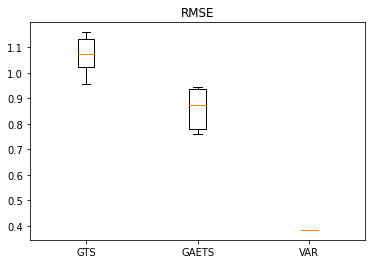

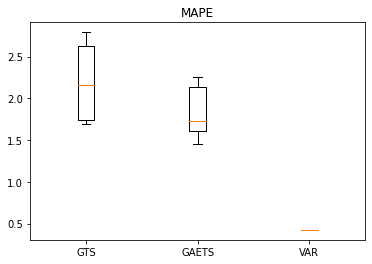

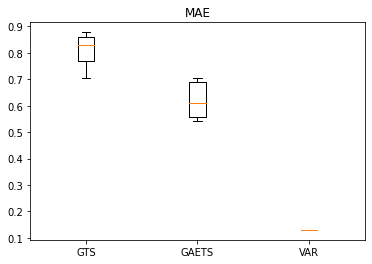

In [ ]:
""" Score Visualisation """

score_ticks = ["RMSE", "MAPE", "MAE"]
list_models = ["GTS", "GAETS", "VAR"]

for score_name in score_ticks:
  plt.title(score_name)
  scoreDF = mc_scores_df[[score_name]]
  for i, model_name in enumerate(list_models):
    score_value = scoreDF[scoreDF.index == model_name].values
    plt.boxplot(score_value, positions=[i], showfliers=False)
  plt.xticks(range(len(list_models)), list_models)
  plt.plot()
  plt.show()
